In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
test.shape

(28000, 784)

In [6]:
train_X,train_y=train.iloc[:,1:].values,train.iloc[:,0].values

In [7]:
train_X.shape

(42000, 784)

In [8]:
train_X = train_X.reshape(train_X.shape[0],28,28)
train_X.shape

(42000, 28, 28)

In [9]:
test = test.values.reshape(test.shape[0],28,28)
test.shape

(28000, 28, 28)

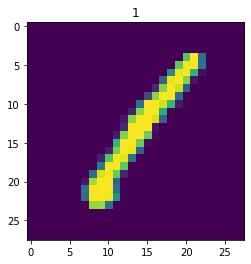

In [10]:
plt.imshow(train_X[0])
plt.title(train_y[0])
plt.show()

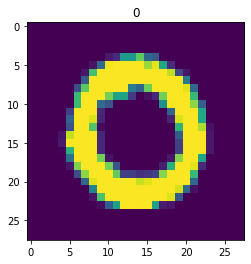

In [11]:
plt.imshow(train_X[1])
plt.title(train_y[1])
plt.show()

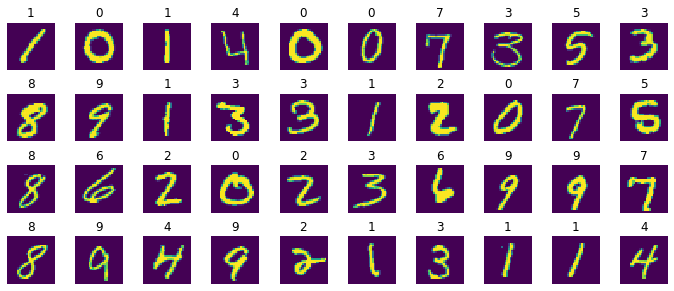

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_X[index], interpolation="nearest")
        plt.axis('off')
        plt.title(train_y[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [13]:
train_X = train_X/255
test = test/255

model

In [14]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)

In [15]:
train_y.shape

(42000, 10)

In [16]:
train_X[0].shape

(28, 28)

In [17]:
train_X=train_X.reshape(train_X.shape[0],28,28,1)
train_X.shape

(42000, 28, 28, 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [19]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [21]:
model.compile(loss='categorical_crossentropy',optimizer = 'rmsprop',metrics=["accuracy"])

In [22]:
history = model.fit(train_X,train_y, epochs=3, shuffle=True, batch_size=32,validation_split=0.2)

Epoch 1/3
1050/1050 [==============================] - 27s 25ms/step - loss: 0.1653 - accuracy: 0.9483 - val_loss: 0.0643 - val_accuracy: 0.9804
Epoch 2/3
1050/1050 [==============================] - 26s 25ms/step - loss: 0.0521 - accuracy: 0.9835 - val_loss: 0.0408 - val_accuracy: 0.9883
Epoch 3/3
1050/1050 [==============================] - 30s 29ms/step - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.0379 - val_accuracy: 0.9889


<function matplotlib.pyplot.show(close=None, block=None)>

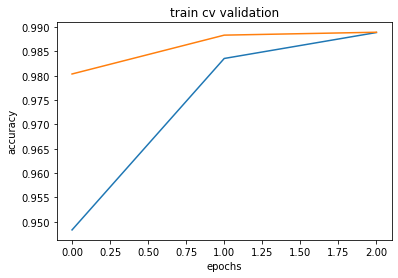

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("train cv validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show

In [24]:
import tensorflow

In [25]:
(train_x,train_y),(test_x,test_y)=tensorflow.keras.datasets.fashion_mnist.load_data()

In [26]:
train_x.shape

(60000, 28, 28)

In [27]:
class_names = ["T-shirt", "Trouser", "pullover", "Dress", "coat",
               "sandal", "shirt", "sneakers", "bag", "ankle boot"]

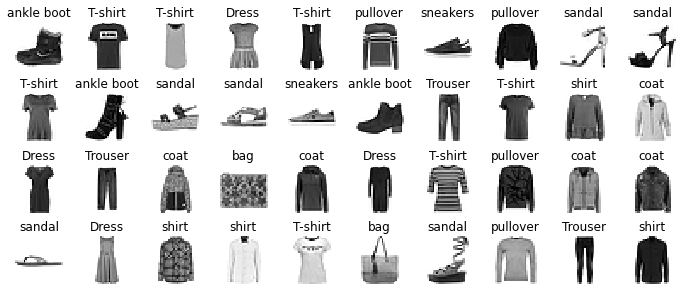

In [28]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_x[index],cmap='binary', interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[train_y[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [29]:
train_x=train_x.reshape(train_x.shape[0],28,28,1)
train_x.shape

(60000, 28, 28, 1)

In [30]:
test_x=test_x.reshape(test_x.shape[0],28,28,1)
test_x.shape

(10000, 28, 28, 1)

In [31]:
train_y=to_categorical(train_y)
test_y=to_categorical(test_y)

In [32]:
train_x=train_x/255
test_x=test_x/255

In [33]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(150,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy',optimizer = 'rmsprop',metrics=["accuracy"])

In [36]:
history = model.fit(train_x,train_y, epochs=10, shuffle=True, batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 36s 94ms/step - loss: 0.4083 - accuracy: 0.8501 - val_loss: 0.3783 - val_accuracy: 0.8600
Epoch 2/10
375/375 [==============================] - 36s 96ms/step - loss: 0.3564 - accuracy: 0.8681 - val_loss: 0.3447 - val_accuracy: 0.8743
Epoch 3/10
375/375 [==============================] - 41s 110ms/step - loss: 0.3230 - accuracy: 0.8796 - val_loss: 0.3373 - val_accuracy: 0.8721
Epoch 4/10
375/375 [==============================] - 39s 105ms/step - loss: 0.2966 - accuracy: 0.8896 - val_loss: 0.3341 - val_accuracy: 0.8781
Epoch 5/10
375/375 [==============================] - 36s 95ms/step - loss: 0.2725 - accuracy: 0.8997 - val_loss: 0.3150 - val_accuracy: 0.8821
Epoch 6/10
375/375 [==============================] - 35s 94ms/step - loss: 0.2527 - accuracy: 0.9054 - val_loss: 0.3104 - val_accuracy: 0.8849
Epoch 7/10
375/375 [==============================] - 35s 94ms/step - loss: 0.2356 - accuracy: 0.9122 - val_loss: 0.3007 - val_accurac